In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\Raju A S\\Desktop\\python\\delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

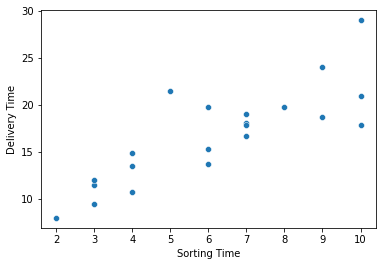

In [3]:
sns.scatterplot(x=data["Sorting Time"], y=data["Delivery Time"])

In [4]:
 data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [5]:
x=np.array(data["Sorting Time"])
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  1
Shape :  (21,)


In [6]:
x=x.reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (21, 1)


In [7]:
y=np.array(data["Delivery Time"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (21, 1)


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
print("Length of X_train : ", len(x_train))
print("Length of Y_train : ", len(y_train))
print("Length of X_test : ", len(x_test))
print("Length of Y_test : ", len(y_test))

Length of X_train :  16
Length of Y_train :  16
Length of X_test :  5
Length of Y_test :  5


In [10]:
x_test

array([[9],
       [7],
       [4],
       [9],
       [6]], dtype=int64)

In [11]:
y_test

array([[24.  ],
       [16.68],
       [10.75],
       [18.75],
       [13.75]])

In [12]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
model.score(x_test,y_test)

0.6481196900078243

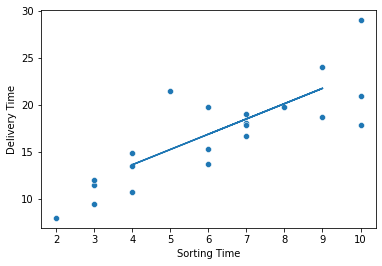

In [14]:
sns.scatterplot(x=data["Sorting Time"],y=data["Delivery Time"])
plt.plot(x_test,model.predict(x_test))
plt.show()

In [15]:
model.coef_

array([[1.62377557]])

In [16]:
model.intercept_

array([7.15133255])

In [17]:
y_predicted = model.predict(x_test)
y_predicted = np.round(y_predicted,2)
y_predicted

array([[21.77],
       [18.52],
       [13.65],
       [21.77],
       [16.89]])

In [18]:
x_test[0:,0]

array([9, 7, 4, 9, 6], dtype=int64)

In [19]:
y_test[0:,0]

array([24.  , 16.68, 10.75, 18.75, 13.75])

In [21]:
data_1 = {"Test_Sorting_Time" : x_test[0:,0], "Actual_Delivery_Time" : y_test[0:,0], "Predicted_Delivery_Time" : y_predicted[0:,0]}
data_1 = pd.DataFrame(data_1)
data_1.to_csv("C:\\Users\\Raju A S\\Desktop\\python\\delivery_time.csv")
data_1.head()

,Test_Sorting_Time,Actual_Delivery_Time,Predicted_Delivery_Time
0,9,24.00,21.77
1,7,16.68,18.52
2,4,10.75,13.65
3,9,18.75,21.77
4,6,13.75,16.89


In [22]:
import statsmodels.formula.api as smf

In [23]:
linear_model = smf.ols("y~x", data=data).fit()

In [24]:
linear_model.params


Intercept    6.582734
x            1.649020
dtype: float64

In [25]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           3.98e-06
Time:                        22:32:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""